In [151]:
import pandas as pd

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
from sklearn.model_selection import train_test_split    # train splitted data [ feature and target data ]
from sklearn.preprocessing import LabelEncoder          # transform data from categorical to numaric 

In [154]:
# Regression algos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [155]:
# classification
from sklearn.linear_model import LogisticRegression #
from sklearn.ensemble import RandomForestClassifier #
from sklearn.tree import DecisionTreeClassifier

In [156]:
# Clustering
from sklearn.cluster import KMeans                      # cluster = get samilar group

In [157]:
path = "https://raw.githubusercontent.com/edyoda/Data-Scientist-program/master/Practice%20Problems/data/student-mat.csv"
def read_data(path):
    data = pd.read_csv(path, sep=';')
    return data.head()

data = read_data(path)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 33 columns):
school        5 non-null object
sex           5 non-null object
age           5 non-null int64
address       5 non-null object
famsize       5 non-null object
Pstatus       5 non-null object
Medu          5 non-null int64
Fedu          5 non-null int64
Mjob          5 non-null object
Fjob          5 non-null object
reason        5 non-null object
guardian      5 non-null object
traveltime    5 non-null int64
studytime     5 non-null int64
failures      5 non-null int64
schoolsup     5 non-null object
famsup        5 non-null object
paid          5 non-null object
activities    5 non-null object
nursery       5 non-null object
higher        5 non-null object
internet      5 non-null object
romantic      5 non-null object
famrel        5 non-null int64
freetime      5 non-null int64
goout         5 non-null int64
Dalc          5 non-null int64
Walc          5 non-null int64
health        

### Q1. Add average marks section ?

In [159]:
def average_marks(data):
    data['average_marks'] = data[['G1','G2','G3']].apply(lambda x: (x['G1'] + x['G2'] + x['G3']) / 3, axis=1)
    return data
average_marks(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_marks
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


### Q2. Plot the relationship between romantic & average marks ?

In [21]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'average_marks'],
      dtype='object')

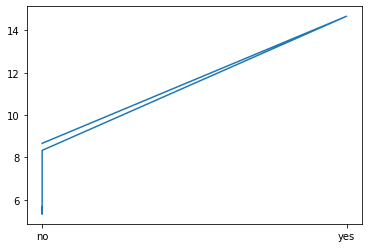

In [29]:
def plot_data(data):
    plotting = plt.plot(data.romantic, data.average_marks)
    return plotting
plot_data(data)

### Q3. Does the data have any missing values ?

In [77]:
def check_null_value(data):
    null_data = data.isnull()
    if null_data == True:
        return "Data Has Missing Values"
    else:
        return "Data Doesn't Have Missing Values"
check_null_value(data)

In [ ]:
fit  ,transform ,  predict

### Q4. Transform all the categorial columns into numberical columns ?

In [161]:
# obj = data.select_dtypes(include='object')
# obj_en = {}

def transeform_object_types(data):
    for column in data.columns:
        
        if data[column].dtypes == 'object':
            
            data[column+'_le'] = LabelEncoder()
            
            data[column+'_en'] = data[column+'_le'].fit_transform(data.column)
            
            
    return data
    
        
transeform_object_types(data)

AttributeError: 'Series' object has no attribute 'fit_transform'

### Q5. Create a regression for predicting marks based on other columns ?

In [99]:
def create_regression_algos():
    lr= LinearRegression()
    dt = DecisionTreeRegressor()
    svr = SVR()
    rf = RandomForestRegressor()
    return lr, dt, svr, rf

create_regression_algos()

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
     gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
     tol=0.001, verbose=False),
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oo

In [72]:
feature_data = data.drop(columns=['average_marks','G1','G2','G3'])
feature_data
target_data = data.average_marks
target_data

0     5.666667
1     5.333333
2     8.333333
3    14.666667
4     8.666667
Name: average_marks, dtype: float64

### Q6. Split the model into train & test

In [73]:
trainX , testX , trainY , testY = train_test_split(feature_data , target_data)

### Q7. Train the model using training data ?

In [78]:
lr.fit(trainX,trainY)

In [ ]:
dt.fit(trainX,trainY)

In [ ]:
svr.fit(trainX,trainY)

In [ ]:
rf.fit(trainX,trainY)

### Q8. Test the model using test data ?

In [ ]:
lr.predict(testX)

In [ ]:
dt.predict(testX)

In [ ]:
svr.predict(testX)

In [ ]:
rf.predict(testX)

### Q9. Find accuracy of the model using score function ?

In [ ]:
lr.score(testX,testY)

In [ ]:
dt.score(testX,testY)

In [ ]:
svr.score(testX,testY)

In [ ]:
rf.score(testX,testY)

<hr/>
<hr/>

### Q10. Create classification model for predicting if internet in available to the student

In [113]:
rfc = RandomForestClassifier()

In [101]:
obj = data.select_dtypes(include='object')

feature_data_classification = data.drop(columns=obj)
target_data_classification = data.internet

### Q11. Split data for training & testing ?

In [102]:
trainX , testX , trainY , testY = train_test_split(feature_data_classification , target_data_classification)

### Q12. Train classification model

In [104]:
rfc.fit(trainX,trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
le_internet = LabelEncoder()

In [108]:
le_internet.fit_transform(target_data)

array([1, 0, 2, 4, 3], dtype=int64)

### Q13. Find score, test for few more models (LogisticRegression, DecisionTree, RandomForest

In [112]:
rfc.score(testX,testY)

0.0

In [111]:
rfc.predict(testX[:2])

array(['no', 'yes'], dtype=object)

In [114]:
lrc = LogisticRegression()
dtc = DecisionTreeClassifier()

In [115]:
lrc.fit(trainX,trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
dtc.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
lrc.score(testX,testY)

0.0

In [119]:
dtc.score(testX,testY)

0.5

In [117]:
lrc.predict(testX[:2])

array(['no', 'yes'], dtype=object)

In [120]:
dtc.predict(testX[:2])

array(['no', 'no'], dtype=object)

<hr>
<hr>

### Q14. Cluster the students into 3 groups using KMeans

In [136]:
cluster_alog = KMeans(n_clusters=2)

In [133]:
le_internet = LabelEncoder()
internet = le_internet.fit_transform(data.internet)


In [123]:
student_internet_data = data[['internet']]

In [ ]:
cluster_alog.fit([internet])

In [ ]:
labels = cluster_alog.predict(student_internet_data)

In [ ]:
data[labels == 2]